<a href="https://colab.research.google.com/github/3OMDEH/Machine-Learning-Projects-Beginner-/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [10]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, average_precision_score, precision_score, f1_score, recall_score, confusion_matrix
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud") # Path to the directory

Using Colab cache for faster access to the 'creditcardfraud' dataset.


# **Loading Dataset**

In [82]:
"""
[data = pd.read_csv(path)] doesn't work since the path is an entire directory, not a csv file.
"""

file_list = os.listdir(path) # the list of files inside the directory
print(file_list) # Showing the files in the list
for file in file_list:
  if file.endswith(".csv"):
    df = pd.read_csv(os.path.join(path,file)) # os.path.join create the complete path to the data file

['creditcard.csv']


# **Data Exploration**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [84]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [85]:
#@title Checking for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [86]:
#@title Showing the correlation between features
df.corr().style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


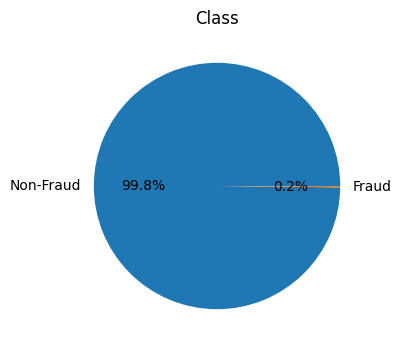

In [87]:
#@title Pie Chart
import matplotlib.pyplot as plt

# Generate the satisfaction data
satisfaction = df['Class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
plt.pie(
    satisfaction,
    labels=['Non-Fraud', 'Fraud'],
    autopct='%1.1f%%'
)
plt.title('Class')
plt.show()

# **Data Fixing**

In [88]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [89]:
df.sort_values(by='Amount', ascending=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
280168,169362.0,2.029909,-0.108466,-1.356157,0.055266,0.030414,-1.069393,0.239821,-0.237493,0.452110,...,-0.085041,-0.101218,0.200800,0.020914,-0.036055,-0.096517,-0.052258,-0.073974,0.00,0
280006,169248.0,-0.661771,0.964343,0.043392,0.132295,1.737370,-1.495161,1.618268,-0.526928,-1.481898,...,0.316618,0.952278,-0.746222,0.054143,1.361398,1.032193,-0.070334,0.027212,0.00,0
161022,113797.0,1.878563,0.020785,-1.621113,2.908813,2.507847,4.709442,-0.830626,1.136154,-0.395755,...,0.079998,0.404327,0.121098,0.707538,0.140100,0.155684,0.016375,-0.053892,0.00,0
46847,42953.0,-1.850968,0.642660,1.887917,0.728445,-1.159859,0.670466,-0.999604,0.925281,0.216929,...,0.203270,0.845510,-0.051716,0.355772,0.013464,1.428911,-0.850957,-0.270682,0.00,0
46877,42968.0,-0.352660,0.586941,2.680417,2.252649,-0.061115,0.955213,0.065583,0.243066,0.142184,...,0.065428,0.675167,-0.283885,0.107212,0.058240,0.175736,-0.077345,-0.193903,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0


# **Data Splitting**

In [90]:
#@title Splitting into x and y
x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [91]:
#@title Scaling the 'Time' Column
scaler = RobustScaler()
x_train['Time'] = scaler.fit_transform(x_train['Time'].values.reshape(-1, 1))
x_test['Time'] = scaler.fit_transform(x_test['Time'].values.reshape(-1, 1))

In [92]:
#@title Scaling the 'Amount' Column
x_train['Amount'] = scaler.fit_transform(x_train['Amount'].values.reshape(-1, 1))
x_test['Amount'] = scaler.fit_transform(x_test['Amount'].values.reshape(-1, 1))
x_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,...,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000
mean,0.119443,0.006496,-0.003405,0.002816,-0.002660,0.001128,-0.002789,0.000568,0.000555,-0.001884,...,0.000590,-0.001457,-0.001687,-0.000201,0.000388,0.000323,0.000533,0.001848,0.000442,0.926371
std,0.557978,1.941083,1.639352,1.511167,1.413955,1.389182,1.334929,1.242068,1.182239,1.095114,...,0.756750,0.716928,0.723851,0.630046,0.604947,0.521251,0.483372,0.397155,0.324104,3.504742
min,-0.993999,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-15.430084,-0.306920
25%,-0.357410,-0.916491,-0.599723,-0.888507,-0.850361,-0.689929,-0.769369,-0.552051,-0.208401,-0.643775,...,-0.211649,-0.228870,-0.542882,-0.161811,-0.354039,-0.317801,-0.327023,-0.070758,-0.052897,-0.229213
50%,0.000000,0.021375,0.064067,0.182761,-0.022519,-0.054215,-0.276737,0.039168,0.021895,-0.052601,...,-0.062490,-0.029790,0.004976,-0.011014,0.040680,0.017653,-0.051654,0.001471,0.011289,0.000000
75%,0.642590,1.315601,0.800160,1.026539,0.740057,0.613912,0.394614,0.569638,0.325570,0.595003,...,0.132771,0.184749,0.525704,0.147543,0.439678,0.351545,0.241266,0.091115,0.078322,0.770787
max,1.036131,2.454930,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,19.587773,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,358.107701


In [93]:
y_train.value_counts()

,count
Class,
0,198269
1,339


In [94]:
#@title Handling Class Imbalance
over_sampling = SMOTE(random_state=42)
x_train,y_train = over_sampling.fit_resample(x_train,y_train)

y_train.value_counts()

,count
Class,
0,198269
1,198269


Keep in mind that for this particular credit card fraud dataset, `RobustScaler` is often preferred for the 'Amount' column because it's less sensitive to outliers, which are common in transaction amounts, and the values can sometimes be zero, which `log` transformation can't handle directly without adding a constant.

# **Building the model**

In [95]:
from sklearn.metrics import log_loss

LR_model = LogisticRegression(class_weight= {0: 1.5, 1: 10}) # initializing the model
LR_model.fit(x_train, y_train) # training the model
loss = log_loss(y_test, LR_model.predict_proba(x_test)) # y_test vs y_predicted
print(f"Logg loss: {loss:.4f}")
proba = LR_model.predict_proba(x_test) #  used to get the probability for each data point belonging to each class

y_pred = LR_model.predict(x_test)

Logg loss: 0.3631


<Figure size 800x600 with 0 Axes>

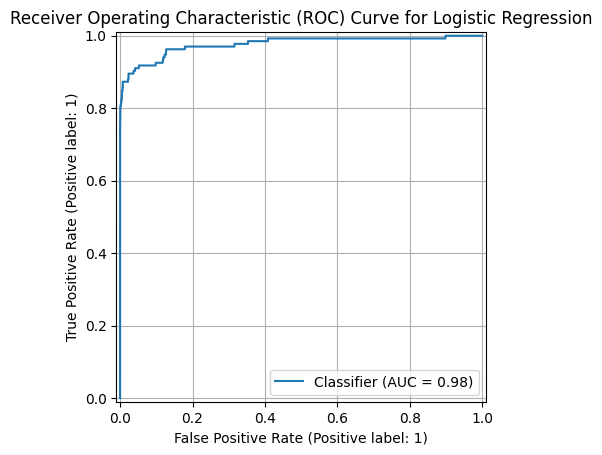

In [96]:
#@title ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Use actual y_test and predicted probabilities from your logistic regression model
y_true = y_test
y_pred_proba = proba[:, 1]  # Probabilities for the positive class (Class=1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using RocCurveDisplay for a cleaner plot
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_true, y_pred_proba)
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

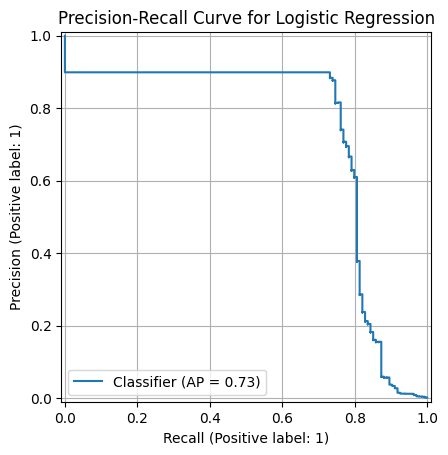

In [97]:
#@title Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Use actual y_test and predicted probabilities from your logistic regression model
y_true = y_test
y_pred_proba = proba[:, 1]  # Probabilities for the positive class (Class=1)

# Compute precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
# average_precision = average_precision_score(y_true, y_pred_proba)

# Plot the Precision-Recall curve using PrecisionRecallDisplay
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_predictions(y_true, y_pred_proba)
plt.title('Precision-Recall Curve for Logistic Regression')
plt.grid(True)
plt.show()